In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import (
    QuantumCircuit, 
    Aer, 
    IBMQ, 
    assemble, 
    transpile,
    execute,
)
from qiskit.test.mock import FakeAthens
import math

IBMQ.save_account("5743a5c607636e43b7431c0370ec874af29cbf102ad69bcfc87a0fbbd1cf560fd841e69aef0e96eb0e1b6e3a59c5c3d72d89623b46f0964099e0195708aa9c05")

configrc.store_credentials:WARNING:2022-03-13 07:54:00,015: Credentials already present. Set overwrite=True to overwrite.


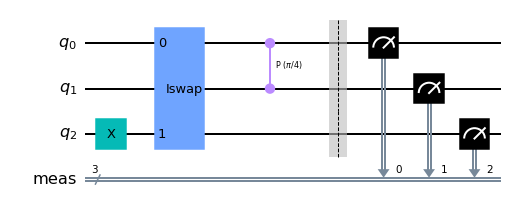

In [8]:
circuit = QuantumCircuit(3)
circuit.x(2)
circuit.iswap(0, 2)
circuit.cp(math.pi / 4, control_qubit=0, target_qubit=1)
circuit.measure_all()
circuit.draw(output="mpl")

ibmqfactory.load_account:WARNING:2022-03-13 08:21:46,066: Credentials are already in use. The existing account in the session will be replaced.


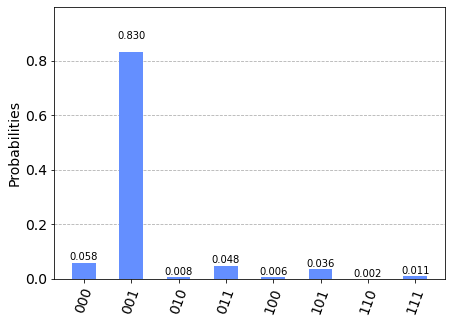

In [9]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend("ibmq_santiago")

counts = execute(circuit, device).result().get_counts()
plot_histogram(counts)